In [1]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
from scipy.optimize import curve_fit
from dropletsProject.vectorsAndConstants import *
from dropletsProject.utilityFunctions import *
import matplotlib
import matplotlib.pyplot as plt 
import re

In [2]:
pappu_a:pd.DataFrame = pd.read_excel(pathPappuA, sheet_name=0, header = [3])
pappu_a:pd.DataFrame = pappu_a.iloc[:, 1:17] # Selecting the columns of interest
display(pappu_a.head())
# Renaming columns
pappu_columns:List[str] = [] 
for i, column in enumerate(tail(list(pappu_a.columns))): 
    if i%3 == 0: 
        pappu_columns += [re.findall('[0-9]\.[0-9]+|[0-9]',column)[0]+ f'_{j}' for j in range(3)] 


pappu_a.columns = ['Size'] + pappu_columns

,Size (nm),0.125 μM,Unnamed: 3,Unnamed: 4,0.25 μM,Unnamed: 6,Unnamed: 7,0.5 μM,Unnamed: 9,Unnamed: 10,1 μM,Unnamed: 12,Unnamed: 13,2 μM,Unnamed: 15,Unnamed: 16
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15,226059,0,0,44266,0,0,90795,0,40964,0,0,0,0,0,0
2,25,1022404,185926,176869,637429,594488,485078,953347,834614,475181,45768,36957,84194,916456,423718,233628
3,35,1443696,617540,214104,2363798,2268963,2098707,4103932,2561687,2916626,816193,997847,1494445,2726831,1618465,1588671
4,45,760381,703863,1470804,7179925,7867058,5415059,11667153,9750937,8192770,3951288,3865732,2967841,7767336,5890381,4679236


In [3]:
k_array_lines_a, k_array_std_a = k_array_lines_pappu_a(pappu_a, pappu_a_conc, k_to_try_pappu_a)
def keysTail(i:int) -> List[float]:
    return (tail<<fC>>strToFloat)(k_array_lines_a[i].keys())
def valuesTail(i:int) -> List[float]:
    return (tail<<fC>>list)(k_array_lines_a[i].values())

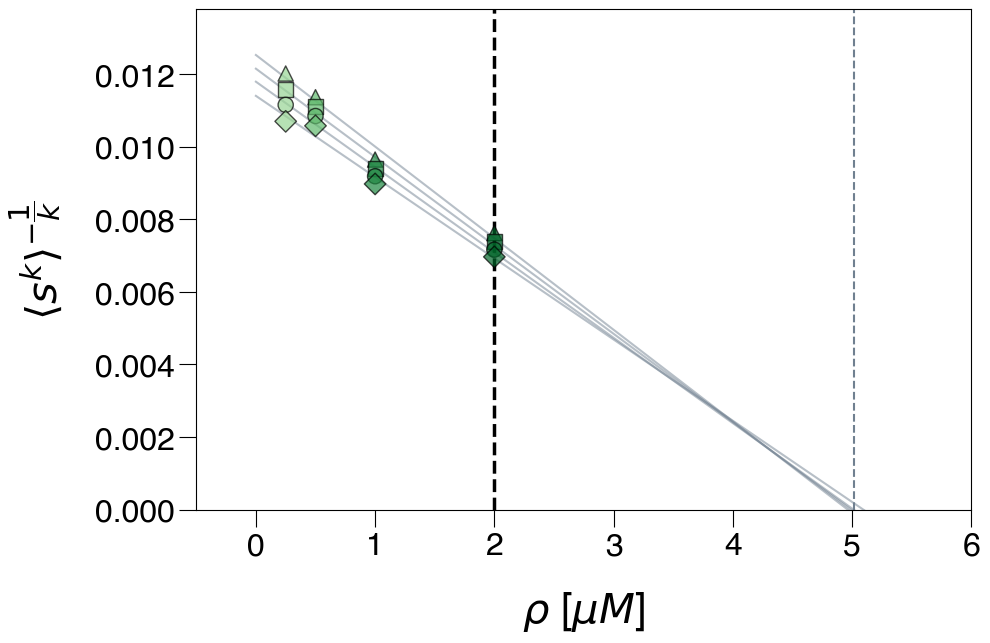

In [4]:
setFontMatplotlib()
fig, ax = createCanvas()
slopes_a:dict= {}; intercepts_a:dict = {}; r_a:dict = {}; se_a:dict = {}
rho_c_a_list:List[float] = []
var_list_a:List[float] = []

n_colors:int = len(pappu_a_conc) - 1
colors_perc:List[float] = [0.4, 0.55, 0.77, 0.9]
colors:dict = {conc: cmapPappuA(colors_perc[i]) for i, conc in enumerate(tail(pappu_a_conc))}
x_axis:np.array = np.linspace(0, 10, 1000)
for i in range(len(k_to_try_pappu_a)):
    ax.scatter(keysTail(i), valuesTail(i), color = list(colors.values()), alpha = 0.7,\
            marker = markersDead[i], label = f'k = {k_to_try_pappu_a[i]}', zorder = 4, s = 120, edgecolors = 'black')

    slope, intercept, r, _, se = linregress(keysTail(i), valuesTail(i))
    popt, pcov = curve_fit(line, keysTail(i), valuesTail(i))
    var_list_a.append(varPropagationDead(*(list(popt) + list(np.diag(pcov)))))
    slopes_a[k_to_try_pappu_a[i]] = slope
    intercepts_a[k_to_try_pappu_a[i]] = intercept
    r_a[k_to_try_pappu_a[i]] = r
    se_a[k_to_try_pappu_a[i]] = se    
    rho_c_a_list.append(- intercept / slope)
    ax.plot(x_axis, slope * x_axis + intercept, label = f'k = {k_to_try_pappu_a[i]} fit', color='slategrey',\
        alpha = 0.5, zorder = 2)
ax.axvline(critical_c_a, color = 'black', linestyle = '--', label = 'Critical concentration', linewidth = 2.5)
final_rho_c_a:float = np.mean(rho_c_a_list)
ax.axvline(final_rho_c_a, color = 'slategrey', linestyle = '--', label = 'Critical concentration')
ax.set_ylim(bottom = 0)
ax.set_xlim(right = 6)
ax.set_xlabel('$\\rho$ [$\mu M$]', fontsize = 30, labelpad = 20)
ax.set_ylabel('$ \left <  s^{k} \\right >^{-\dfrac{1}{k}} $', fontsize = 30, labelpad = 20)
ax.tick_params(axis='both', which='major', labelsize=23, length=12)

#ax.set_title('Estimation of the critical concetration - Pappu A', fontsize = 20, pad = 20)
#fig.savefig('../../paperPlots/pdfPlots/Fig4B.pdf', dpi = 300, facecolor = 'white', bbox_inches = 'tight')
#fig.savefig('../../paperPlots/svgPlots/Fig4B.svg', dpi = 300, facecolor = 'white')


In [5]:
y_bar, var = weightedAverage(var_list_a, rho_c_a_list)
final_rho_c_a = np.mean(rho_c_a_list)

In [6]:
ratio_arr_list:List[float] = []
k_mom_list:List[float] = []
k_mom_1_list:List[float] = []
k_mom_std:List[float] = []
k_mom_1_std:List[float] = []
for k in k_to_try_pappu_a:
    k_mom = dict_moment(pappu_a, pappu_a_conc, k)
    k_mom_list.append(k_mom)
    k_mom_std.append(dict_moment_std(pappu_a, pappu_a_conc, k))
    k_1_mom = dict_moment(pappu_a, pappu_a_conc, k + 1)
    k_mom_1_list.append(k_1_mom)
    k_mom_1_std.append(dict_moment_std(pappu_a, pappu_a_conc, k + 1))

    k_mom_arr = np.array(list(k_mom.values()))
    k_1_mom_arr = np.array(list(k_1_mom.values()))
    ratio_dict = {np.abs((float(conc) - final_rho_c_a)/final_rho_c_a):\
         k_1_mom_arr[i] / k_mom_arr[i] \
        for i, conc in enumerate(pappu_a_conc)}
    ratio_arr_list.append(ratio_dict)

In [7]:
err_dict:dict = {}
for i in range(len(k_to_try_pappu_a)):
    err_dict[k_to_try_pappu_a[i]] = {}
    for conc in pappu_a_conc:
        
        
        yerr = np.sqrt( (1 / k_mom_1_list[i][conc])**2 * k_mom_1_std[i][conc] ** 2 +\
            (1 / k_mom_list[i][conc])**2 * k_mom_std[i][conc] ** 2)

        err_dict[k_to_try_pappu_a[i]][conc] = yerr

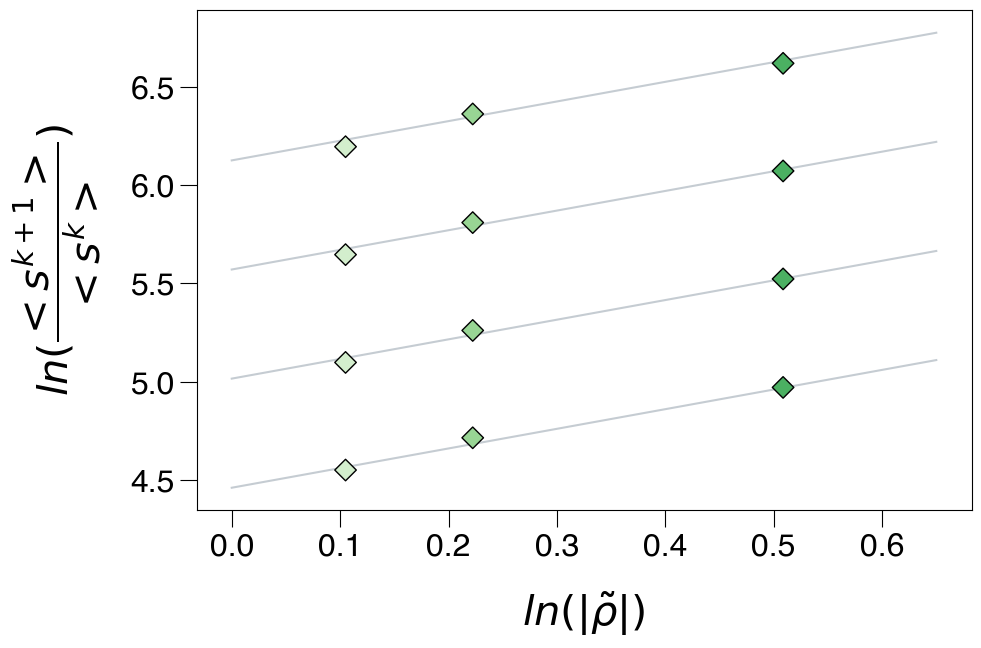

In [8]:
x_axis = np.linspace(-0.65, -0, 100)
fig, ax = createCanvas()
n_colors = len(pappu_a_conc)
colors:dict = {conc: cmapPappuA(np.linspace(0.2, 1, n_colors))[i] for i, conc in enumerate(tail2(pappu_a_conc))}
for i, dict_ in enumerate(ratio_arr_list):
    ax.scatter(-tail2(np.log(np.array(list(dict_.keys())))),\
         np.log(np.exp(i/2) * tail2(np.array(list(dict_.values())))), marker = 'D', zorder = 3,\
            color = list(colors.values()), label = f'k = {k_to_try_pappu_a[i]}', alpha = 1,\
                edgecolor = 'black', s = 120)


    slope, intercept, r, p, se = linregress(tail2(np.log(np.array(list(dict_.keys())))),\
    np.log(tail2(np.array(list(dict_.values())))))


    ax.plot(-x_axis, -1 * x_axis + 4.46 + i/1.8, color = 'slategrey', alpha = 0.4, zorder = 1)


ax.set_xlabel('$ln( | \\tilde{\\rho} |)$', fontsize = 30, labelpad = 20)  
ax.set_ylabel('$ ln(\dfrac{ <s^{k+1}>}{<s^{k}>})$', fontsize=30, labelpad = 20)

ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())  
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())  
ax.tick_params(axis='both', which='major', labelsize=23, length=12)  
#fig.savefig('../../pdfPlots/FigS1a.pdf', dpi = 300, facecolor = 'white', bbox_inches = 'tight')
#fig.savefig('../../pdfPlots/FigS1a.svg', dpi = 300, facecolor = 'white')



In [9]:
pappu_a_len:int = len(pappu_a)
dict_df_conc_a:dict = {} 
for conc in pappu_a_conc: 
    dict_df_conc_a[conc] = pd.DataFrame(columns = [conc]) 
for _ in range(num_tries): 
    mask_dict_a = {}      

    for conc in pappu_a_conc: 
        mask = np.zeros((pappu_a_len, 3)) 
        mask[np.arange(pappu_a_len), np.random.choice(3, pappu_a_len)] = 1 
        mask_dict_a[conc] = mask 
    masked_pappu_a:dict = {} 

    for conc in pappu_a_conc: 
        column_idx = pappu_a_conc.index(conc) 
        columns = np.array(pappu_a)[:, column_idx * 3 + 1: column_idx * 3 + 4] 
        columns_masked = np.sum(columns * mask_dict_a[conc], axis = 1) 
        masked_pappu_a[conc] = columns_masked 
    cum_pappu_a:dict = {} 

    for conc in pappu_a_conc: 
        cum_pappu_a[conc] = 1 - np.insert(np.cumsum(masked_pappu_a[conc]), 0, 0)[:-1]/np.sum(masked_pappu_a[conc]) 
    dataframe_cum_a:pd.DataFrame = pd.DataFrame(cum_pappu_a) 

    for conc in pappu_a_conc: 
        dict_df_conc_a[conc] = pd.concat([dict_df_conc_a[conc], dataframe_cum_a[conc]], axis = 1)
final_cum_dict_a:dict = {}

for conc in pappu_a_conc:
    final_cum_dict_a[conc] = pd.DataFrame(np.nanmean(dict_df_conc_a[conc], axis = 1), columns = ['mean'])
    final_cum_dict_a[conc]['std'] = np.std(dict_df_conc_a[conc], axis = 1)

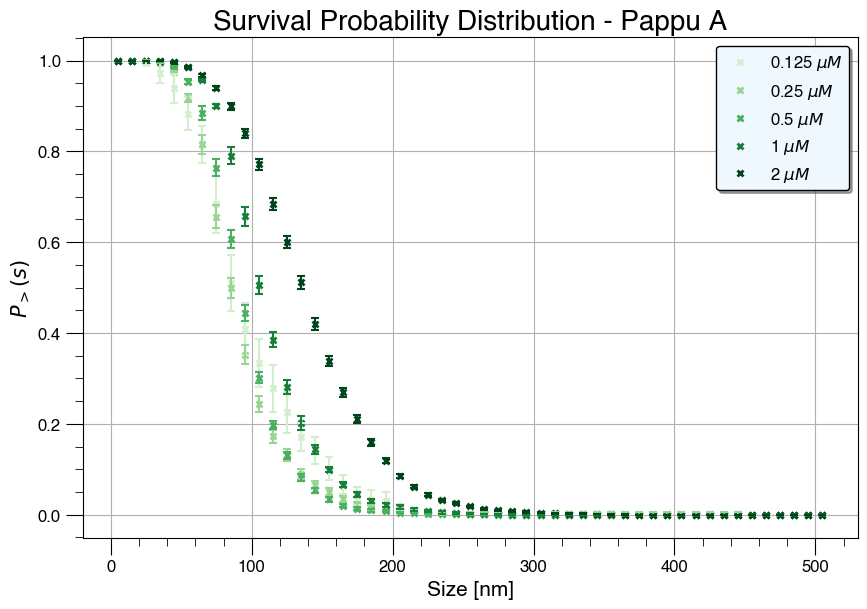

In [10]:
fig, ax = createCanvas()
n_colors = len(pappu_a_conc) 
colors = {conc: cmapPappuA(np.linspace(0.2, 1, n_colors))[i] for i, conc in enumerate(pappu_a_conc)}
for conc in pappu_a_conc:
    ax.plot(pappu_a['Size'], final_cum_dict_a[conc]['mean'],\
        label = f'{conc} $\mu M$', markeredgewidth = 2, linestyle = 'None',\
             markersize = 5, zorder = 4, marker = 'x', color = colors[conc])

    yerr = final_cum_dict_a[conc]['std']

    ax.errorbar(pappu_a['Size'], final_cum_dict_a[conc]['mean'],\
                yerr = yerr, fmt='none', zorder = 8, capsize = 3, capthick = 1.5, color = colors[conc])

ax.set_xlabel('Size [nm]', fontsize = 15)
ax.set_ylabel('$P_>(s)$', fontsize = 15)
ax.set_title('Survival Probability Distribution - Pappu A', fontsize = 20)

ax.grid(zorder=1)

ax.legend(facecolor = 'aliceblue', fontsize = 12, shadow = True, edgecolor = 'black')

ax.tick_params(axis='both', which='major', labelsize=12, length=12)
ax.tick_params(axis='both', which='minor', labelsize=12, length=6)
ax.minorticks_on()

In [11]:
for conc in pappu_a_conc:
    array_occurances = np.array(pappu_a)
    sizes = np.array(pappu_a['Size'])
    concentration_columns_idx = pappu_a_conc.index(conc) 
    column_occurrances = array_occurances[:,concentration_columns_idx*3 + 1:\
         concentration_columns_idx*3 + 4]

    for i in range(100):
          column_chosen_idx = np.random.choice([0,1,2], 1, p=[1/3, 1/3, 1/3])[0]
          column_chosen = column_occurrances[:, column_chosen_idx]
          rand_mean_dict[conc][f'{i}'] = column_chosen
    

means_dict:dict = {}
std_dict:dict = {}


for conc in pappu_a_conc:
    means_dict[conc] = np.mean(rand_mean_dict[conc], axis = 1)
    std_dict[conc] = np.std(rand_mean_dict[conc], axis = 1)


final_std_pappu_a = pd.DataFrame()
final_std_pappu_a['Size'] = pappu_a['Size']

means_pappu_a = pd.DataFrame(means_dict)
means_pappu_a.columns = list(map(lambda x: x + '_mean', list(means_pappu_a)))
std_pappu_a = pd.DataFrame(std_dict)
std_pappu_a.columns = list(map(lambda x: x + '_std', list(std_pappu_a)))

for i in range(len(pappu_a_conc)):
    final_std_pappu_a[list(means_pappu_a.columns)[i]] = means_pappu_a.iloc[:,i]
    final_std_pappu_a[list(std_pappu_a.columns)[i]] = std_pappu_a.iloc[:,i]



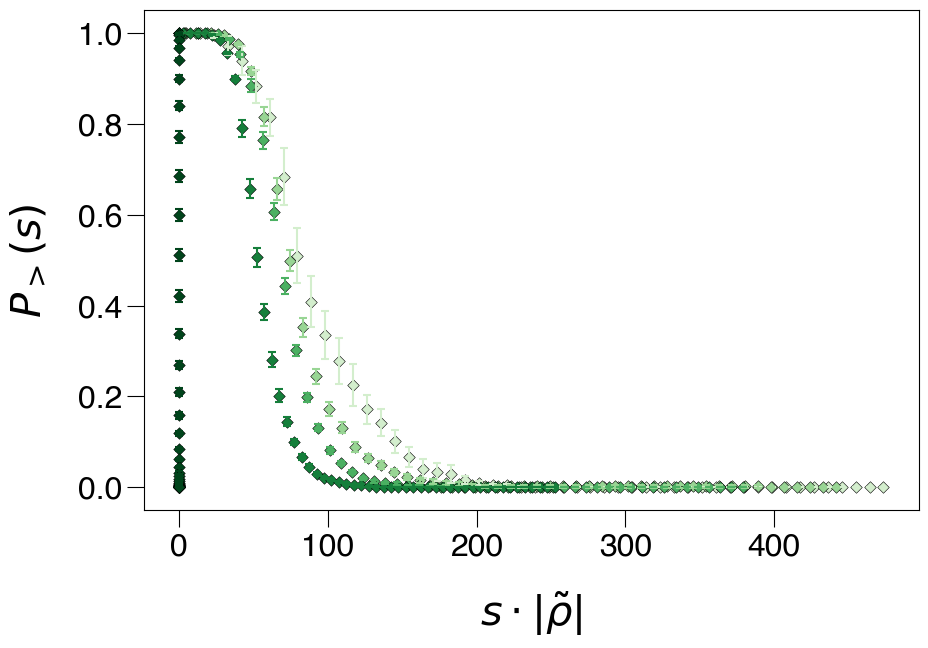

In [12]:
fig, ax = createCanvas()
for conc in pappu_a_conc:
    ax.scatter(np.array(pappu_a['Size']) * np.abs((float(conc) - critical_c_a)/critical_c_a),\
         final_cum_dict_a[conc]['mean'], s = 35, label = f'{conc} $\mu M$',\
          marker = 'D', color = colors[conc], edgecolor = 'black', linewidth = 0.4)

    yerr:float = final_cum_dict_a[conc]['std']

    ax.errorbar(np.array(pappu_a['Size']) * np.abs((float(conc) - critical_c_a)/critical_c_a),\
       final_cum_dict_a[conc]['mean'],\
                yerr = yerr, fmt='none', zorder = 7, capsize = 3, capthick = 1.5,\
                    color = colors[conc], alpha = 1)
ax.set_xlabel('$s \cdot  | \\tilde{\\rho}| $', fontsize = 30, labelpad = 20)
ax.set_ylabel('$P_>(s)$', fontsize = 30, labelpad = 20)

ax.tick_params(axis='both', which='major', labelsize=23, length=12)
#fig.savefig('../../pdfPlots/Fig4C.pdf', dpi = 300, facecolor = 'white', bbox_inches = 'tight')
#fig.savefig('../../pdfPlots/Fig4C.svg', dpi = 300, facecolor = 'white')


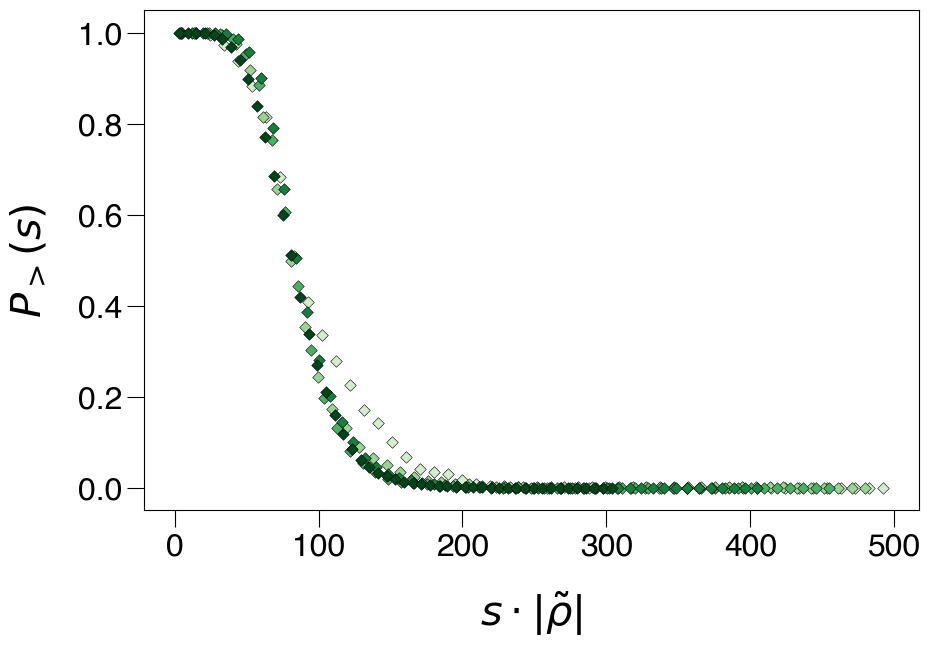

In [14]:
fig, ax = createCanvas()
for conc in pappu_a_conc:
    ax.scatter(np.array(pappu_a['Size']) * np.abs((float(conc)\
         - final_rho_c_a)/final_rho_c_a),\
         final_cum_dict_a[conc]['mean'],\
        label = f'{conc} $\mu M$', edgecolor = 'black', linewidth = 0.4,\
          zorder = 4, color = colors[conc], marker = 'D', s = 35)

    yerr = final_cum_dict_a[conc]['std']

ax.set_xlabel('$s \cdot  | \\tilde{\\rho}| $', fontsize = 30, labelpad = 20)
ax.set_ylabel('$P_>(s)$', fontsize = 30, labelpad = 20)
ax.tick_params(axis='both', which='major', labelsize=23, length=12)
#fig.savefig('../../newCollapse1.pdf', dpi = 300, facecolor = 'white', bbox_inches = 'tight')
#fig.savefig('../../pdfPlots/Fig4D.svg', dpi = 300, facecolor = 'white')